In [1]:
BASE_DIR = '../'*3
MODEL_DIR = BASE_DIR +'code/CNN/cnn_basic/cnn_basic_model.ipynb'
FLW_DIR = BASE_DIR + 'code/UTIL/dataset/flower_prepro.ipynb'
OFFICE_DIR = BASE_DIR +'code/UTIL/dataset/office31_prepro.ipynb'
%run {MODEL_DIR}
%run {FLW_DIR}
%run {OFFICE_DIR}

Using device: cuda
GeForce GTX 1660 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB
Using PyTorch version: 1.10.0
Using device: cuda
GeForce GTX 1660 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB
Using PyTorch version: 1.10.0


In [5]:
EPOCH = 100
BATCH_SIZE=35
NUM_WORKERS=0
LEARNING_RATE = 0.00005

In [3]:
fd = FlowersDataset([96, 96], [3, 96, 96])
print(fd)

flowers(select, 3450+652+215)


(3, 96, 96)
Model flowers_model_1 train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Linear(in_features=27648, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=10, bias=True)
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=10, out_features=5, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 5e-05
    weight_decay: 0
)
    Epoch 1: cost=35.956, accuracy=0.287/0.270 (0/0 secs)
    Epoch 1: cost=26.359, accuracy=0.318/0.330 (0/0 secs)
    Epoch 2: cost=18.768, accuracy=0.365/0.250 (0/0 secs)
    Epoch 2: cost=18.148, accuracy=0.372/0.360 (1/1 secs)
    Epoch 3: cost=11.993, accuracy=0.444/0.360 (0/1 secs)
    Epoch 3: cost=12.726, accuracy=0.431/0.360 (0/1 secs)
    Epoch 4: cost=15.210, accuracy=0.414/0.450 (1/2 secs)
    Epoch 4: cost=13.306, accuracy=0.436/0.370 (0/2 secs)
    Epoch 5: 

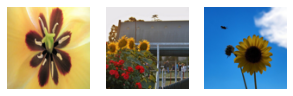

추정확률분포 [ 0, 0, 0,100, 0] => 추정 sunflower : 정답 tulip => X
추정확률분포 [ 0, 0, 0,100, 0] => 추정 sunflower : 정답 sunflower => O
추정확률분포 [ 0,100, 0, 0, 0] => 추정 dandelion : 정답 sunflower => X


In [7]:
#SGD
fm = CnnBasicModel('flowers_model_1', fd, [['full',{'width':30}],
                                           ['full',{'width':10}]])
fm.exec_all(epoch_count=EPOCH, report=40, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )

(3, 96, 96)
Model flowers_model_1 train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1), padding=same)
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=13824, out_features=5, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 5e-05
    weight_decay: 0
)


C:\Users\chang\Anaconda3\envs\testtorch\lib\site-packages\torch\nn\modules\conv.py:443: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  ..\aten\src\ATen\native\Convolution.cpp:647.)
  self.padding, self.dilation, self.groups)


    Epoch 1: cost=20.286, accuracy=0.275/0.380 (2/2 secs)
    Epoch 1: cost=16.487, accuracy=0.315/0.410 (1/3 secs)
    Epoch 2: cost=9.631, accuracy=0.386/0.390 (0/3 secs)
    Epoch 2: cost=9.818, accuracy=0.392/0.350 (0/3 secs)
    Epoch 3: cost=8.015, accuracy=0.439/0.410 (1/4 secs)
    Epoch 3: cost=8.461, accuracy=0.429/0.500 (0/4 secs)
    Epoch 4: cost=7.426, accuracy=0.477/0.400 (0/4 secs)
    Epoch 4: cost=7.321, accuracy=0.469/0.390 (0/4 secs)
    Epoch 5: cost=7.370, accuracy=0.471/0.410 (1/5 secs)
    Epoch 5: cost=7.285, accuracy=0.489/0.380 (0/5 secs)
    Epoch 6: cost=5.750, accuracy=0.526/0.360 (0/5 secs)
    Epoch 6: cost=5.852, accuracy=0.515/0.450 (1/6 secs)
    Epoch 7: cost=5.146, accuracy=0.536/0.430 (0/6 secs)
    Epoch 7: cost=5.070, accuracy=0.546/0.320 (0/6 secs)
    Epoch 8: cost=5.029, accuracy=0.555/0.500 (1/7 secs)
    Epoch 8: cost=5.317, accuracy=0.553/0.410 (0/7 secs)
    Epoch 9: cost=4.704, accuracy=0.572/0.400 (0/7 secs)
    Epoch 9: cost=5.563, accu

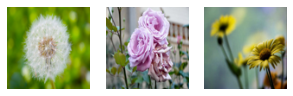

추정확률분포 [ 0,100, 0, 0, 0] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [ 0, 0,100, 0, 0] => 추정 rose : 정답 rose => O
추정확률분포 [ 0,40,41,19, 0] => 추정 rose : 정답 daisy => X


In [4]:
#SGD
fm = CnnBasicModel('flowers_model_1', fd, [['conv', {'ksize':2, 'chn':6}], 
                ['max', {'stride':2}], 
                ])
fm.exec_all(epoch_count=EPOCH, report=40, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )


(3, 96, 96)
Model flowers_model_1 train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(2, 2), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=6912, out_features=5, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 5e-05
    weight_decay: 0
)
    Epoch 1: cost=5.009, accuracy=0.226/0.260 (0/0 secs)
    Epoch 1: cost=4.171, accuracy=0.258/0.320 (0/0 secs)
    Epoch 2: cost=2.711, accuracy=0.325/0.290 (1/1 secs)
    Epoch 2: cost=2.602, accuracy=0.324/0.350 (0/1 secs)
    Epoch 3: cost=2.284, accuracy=0.

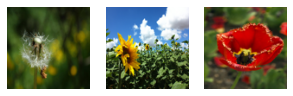

추정확률분포 [43,50, 2, 1, 5] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [ 6, 4, 3,27,60] => 추정 tulip : 정답 sunflower => X
추정확률분포 [ 2, 1,38,17,42] => 추정 tulip : 정답 tulip => O


In [5]:
#SGD
fm = CnnBasicModel('flowers_model_1', fd, [['conv', {'ksize':2, 'chn':6,'actfunc':'relu'}], 
                ['max', {'stride':2}],
                                           ['conv', {'ksize':2, 'chn':12,'actfunc':'relu'}], 
                ['avg', {'stride':2}]
                ])
fm.exec_all(epoch_count=EPOCH, report=40, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )


(3, 96, 96)
Model flowers_model_3 train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(4, 4), stride=(4, 4), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
    (6): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (7): ReLU()
    (8): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
    (9): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (10): ReLU()
    (11): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=432, out_features=5, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    

    Epoch 62: cost=1.015, accuracy=0.596/0.500 (0/40 secs)
    Epoch 62: cost=1.029, accuracy=0.593/0.510 (1/41 secs)
    Epoch 63: cost=1.025, accuracy=0.593/0.500 (0/41 secs)
    Epoch 63: cost=1.015, accuracy=0.598/0.500 (0/41 secs)
    Epoch 64: cost=1.051, accuracy=0.572/0.510 (1/42 secs)
    Epoch 64: cost=1.033, accuracy=0.585/0.470 (0/42 secs)
    Epoch 65: cost=1.037, accuracy=0.580/0.460 (0/42 secs)
    Epoch 65: cost=1.019, accuracy=0.590/0.550 (1/43 secs)
    Epoch 66: cost=1.020, accuracy=0.579/0.470 (0/43 secs)
    Epoch 66: cost=1.022, accuracy=0.580/0.430 (0/43 secs)
    Epoch 67: cost=1.021, accuracy=0.596/0.500 (1/44 secs)
    Epoch 67: cost=1.011, accuracy=0.594/0.490 (0/44 secs)
    Epoch 68: cost=1.011, accuracy=0.610/0.450 (0/44 secs)
    Epoch 68: cost=1.013, accuracy=0.597/0.480 (1/45 secs)
    Epoch 69: cost=1.012, accuracy=0.586/0.480 (0/45 secs)
    Epoch 69: cost=0.998, accuracy=0.596/0.510 (0/45 secs)
    Epoch 70: cost=0.988, accuracy=0.611/0.460 (1/46 sec

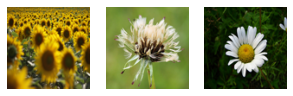

추정확률분포 [ 2, 3, 1,85, 9] => 추정 sunflower : 정답 sunflower => O
추정확률분포 [13,77, 5, 0, 4] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [53,13,27, 1, 6] => 추정 daisy : 정답 daisy => O


In [12]:
fm3 = CnnBasicModel('flowers_model_3', fd, 
               [['conv', {'ksize':5, 'chn':6,'actfunc':'relu'}], 
                ['max', {'stride':4}], 
                ['conv', {'ksize':3, 'chn':12,'actfunc':'relu'}], 
                ['avg', {'stride':2}],
               ['conv', {'ksize':3, 'chn':24,'actfunc':'relu'}], 
                ['avg', {'stride':2}],
               ['conv', {'ksize':3, 'chn':48,'actfunc':'relu'}], 
                ['avg', {'stride':2}],
                ])
fm3.exec_all(epoch_count=EPOCH, report=40, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )

In [13]:
od = Office31Dataset([96, 96], [3, 96, 96])

(3, 96, 96)
Model office31_model_3 train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): Tanh()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): Tanh()
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (7): Tanh()
    (8): AvgPool2d(kernel_size=(3, 3), stride=(3, 3), padding=0)
    (9): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (10): Tanh()
    (11): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=768, out_features=34, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: Fal

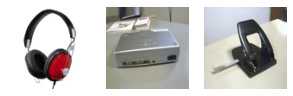

[ 도메인 추정결과 ]
추정확률분포 [63,21,16] => 추정 amazon : 정답 amazon => O
추정확률분포 [76, 2,22] => 추정 amazon : 정답 webcam => X
추정확률분포 [80,10,10] => 추정 amazon : 정답 webcam => X
[ 상품 추정결과 ]
추정확률분포 [ 6, 2, 1, 2, 1, 1, 6, 1,...] => 추정 headphones : 정답 headphones => O
추정확률분포 [ 0, 2, 2, 0, 0, 2, 0, 0,...] => 추정 projector : 정답 projector => O
추정확률분포 [ 0,13, 1, 1, 0, 0, 2, 0,...] => 추정 desktop_computer : 정답 punchers => X


In [16]:
om3 = CnnBasicModel('office31_model_3', od, 
               [['conv', {'ksize':3, 'chn':6, 'actfunc':'tanh'}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':12, 'actfunc':'tanh'}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':24, 'actfunc':'tanh'}], 
                ['avg', {'stride':3}],
               ['conv', {'ksize':3, 'chn':48, 'actfunc':'tanh'}], 
                ['avg', {'stride':2}]])
om3.exec_all(epoch_count=EPOCH, report=80, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )